# Top Charts Song Classification

## Outline
1. <a href='#1'>Introduction</a>
2. <a href='#2'>Dataset Setup</a>
3. <a href='#3'>Results</a>
4. <a href='#4'>Discussion</a>

## 1. Introduction

## 2. Dataset Setup

### Imports

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from spotipy import Spotify, oauth2
import secret

In [33]:
def import_data():
    """
    Import all the song data from raw, unedited csv within this folder
    Returns csv as a dataframe object (still uncleaned)
    Link to Dataset on Kaggle: https://www.kaggle.com/datasets/multispiros/34740-hit-and-nonhit-songs-spotify-features?resource=download
    """
    unedited_song_data = pd.read_csv('unedited_song_data.csv')
    return unedited_song_data

### Spotify API Setup

In [34]:
class SpotifyAPI:
    def __init__(self, client_id: str, client_secret: str):
        """
        Create a SpotifyAPI object
        :param client_id: Your Spotify client ID
        :param client_secret: Your Spotify client secret
        """
        credentials_manager = oauth2.SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
        self.sp = Spotify(client_credentials_manager=credentials_manager)

    def artist_popularity_from_track(self, track_spotify_id: str):
        """
        Returns the popularity of the track's artist
        :param track_spotify_id: Spotify ID of the track
        """
        spotify_track = self.sp.track(track_id=track_spotify_id)
        return spotify_track["artists"][0]["popularity"]

### Data Cleaning Methods

In [35]:
def add_popularity_info(data):
    spotify_api = SpotifyAPI(client_id=secret.spotify_client_id, client_secret=secret.spotify_secret_key)
    added_column_df = data.assign(Artist_Popularity = lambda x: (spotify_api.artist_popularity_from_track(x['track_id'])))
    return added_column_df

In [36]:
def clean_data(unedited_song_data):
    """
    Cleans the given csv by removing not helpful features from our database and
    replaces the artist_name column with the artist popularity metric from the
    Spotify API
    Returns the cleaned DataFrame
    :param unedited_song_data: the unedited and uncleaned DataFrame object
    """
    cleaned_song_data = unedited_song_data.copy()
    del cleaned_song_data['track_title']
    del cleaned_song_data['key']
    del cleaned_song_data['time_signature']

    cleaned_song_data = add_popularity_info(cleaned_song_data)

    del cleaned_song_data['track_id']

    return cleaned_song_data
    

In [37]:
def split_data(cleaned_song_data):
    """
    Splits the training data into a 75%/25% split with the 25% allotted for testing
    Returns the data split into x_train, x_test, y_train and y_test
    :param cleaned_song_data: the cleaned DataFrame object 
    """
    song_y = cleaned_song_data['on_chart']
    song_x = cleaned_song_data.drop(['on_chart'], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(song_x, song_y, test_size=0.25)
    x_train = x_train.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return x_train, x_test, y_train, y_test

<AxesSubplot:>

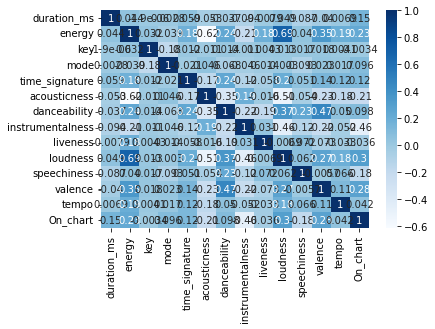

In [40]:
uncleaned_song_data = import_data()
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

### Cleaning the Data

In [39]:
cleaned_dataset = clean_data(uncleaned_song_data)